## Kakadu netCDF data analysis

In [1]:
%matplotlib inline
import xarray as xr

In [2]:
kakadu = xr.open_dataset('kakadu_sar.nc',chunks={'time':1})

In [3]:
kakadu.cover_classes.data

,Array,Chunk
Bytes,47.01 GB,331.05 MB
Shape,"(142, 8348, 4957)","(1, 8348, 4957)"
Count,143 Tasks,142 Chunks
Type,float64,numpy.ndarray


In [4]:
#mamukala segment
mamslice = kakadu.isel(time=30).sel(x=slice(58537.5,70712.5),y=slice(-1340487.5,-1333912.5))

In [6]:
kakadu.isel(time=140).cover_classes.compute().max()

<xarray.DataArray 'cover_classes' ()>
array(4.)
Coordinates:
    time     datetime64[ns] 2019-02-15T20:48:21

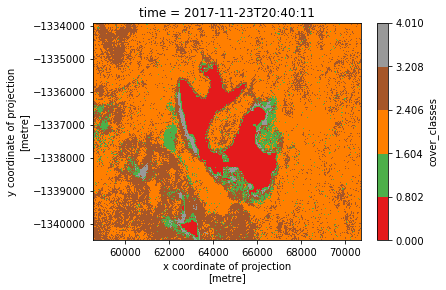

In [7]:
mamslice = kakadu.isel(time=65).sel(x=slice(58537.5,70712.5),y=slice(-1340487.5,-1333912.5)).compute()
mamslice.cover_classes.plot(vmin=0,vmax=4.01,levels=6,cmap='Set1')

In [16]:
kakadu.cover_classes

<xarray.DataArray 'cover_classes' (time: 142, y: 8348, x: 4957)>
dask.array<shape=(142, 8348, 4957), dtype=float64, chunksize=(5, 8348, 4957)>
Coordinates:
  * x        (x) float64 -1.334e+04 -1.331e+04 ... 1.105e+05 1.106e+05
  * y        (y) float64 -1.482e+06 -1.482e+06 ... -1.274e+06 -1.274e+06
  * time     (time) datetime64[ns] 2016-09-28T20:47:26 ... 2019-02-22T20:40:15
Attributes:
    grid_mapping:  crs

In [41]:
import numpy as np
land_arr = np.array([3,3,2,1,2,2,4,0,3])

In [31]:

def map_cover_classes(i):
    return float(land_arr[int(i)]) if ~np.isnan(i) else i

vec_map = np.vectorize(map_cover_classes)

In [82]:
mamslice.cover_classes.shape

(264, 488)

In [67]:
#mamukala segment
mamslice = kakadu.isel(time=24).sel(x=slice(58537.5,70712.5),y=slice(-1340487.5,-1333912.5)).compute()
mamuclasses = xr.apply_ufunc(vec_map,mamslice.cover_classes)

In [8]:
import seaborn as sns
pal = [
       sns.xkcd_rgb["cobalt blue"],
       sns.xkcd_rgb["neon blue"],
       sns.xkcd_rgb["grass"],
       sns.xkcd_rgb["beige"],
       sns.xkcd_rgb["brown"]
       ]

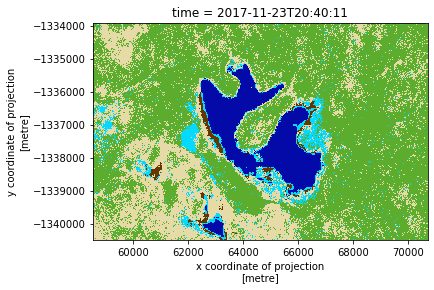

In [9]:


mamslice.cover_classes.plot(vmin = 0, vmax = 4.01, levels=6, colors = pal, add_colorbar=False)

In [40]:
mamslice.cover_classes

<xarray.DataArray 'cover_classes' (y: 264, x: 488)>
dask.array<shape=(264, 488), dtype=float64, chunksize=(264, 488)>
Coordinates:
  * x        (x) float64 5.854e+04 5.856e+04 5.859e+04 ... 7.069e+04 7.071e+04
  * y        (y) float64 -1.34e+06 -1.34e+06 -1.34e+06 ... -1.334e+06 -1.334e+06
    time     datetime64[ns] 2017-03-21T20:48:08
Attributes:
    grid_mapping:  crs

In [11]:
kakadu_dry = kakadu.isel(time=55)

In [ ]:
kakadu_dry = kakadu_dry.compute()

In [21]:
kakadu_dry_cover = xr.apply_ufunc(vec_map,kakadu_dry.cover_classes)

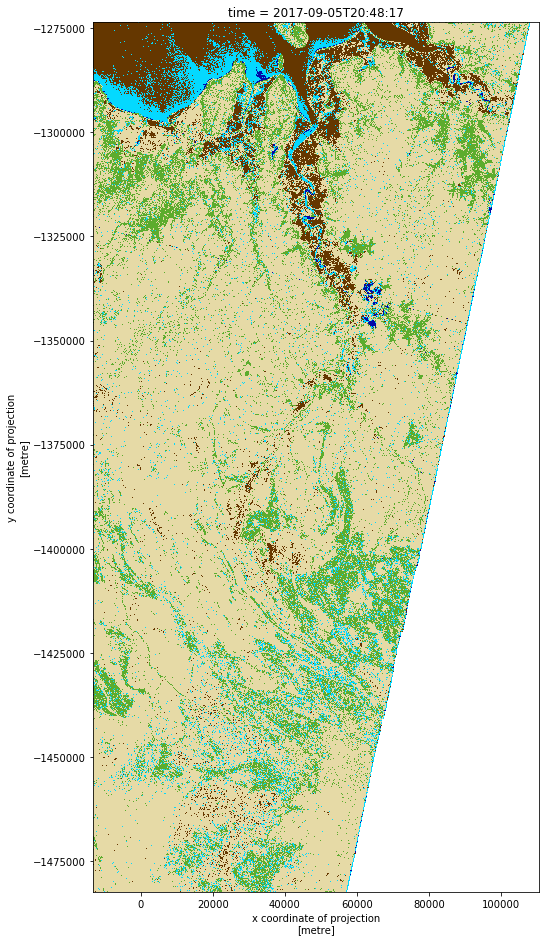

In [12]:
kakadu_dry.cover_classes.plot(vmin = 0, vmax = 4.01, levels=6, colors = pal, add_colorbar=False,figsize=(8,16))

In [13]:
kakadu_wet2 = kakadu.isel(time=22)

In [19]:
kakadu_wet2

<xarray.Dataset>
Dimensions:        (x: 4957, y: 8348)
Coordinates:
  * x              (x) float64 -1.334e+04 -1.331e+04 ... 1.105e+05 1.106e+05
  * y              (y) float64 -1.482e+06 -1.482e+06 ... -1.274e+06 -1.274e+06
    time           datetime64[ns] 2017-02-13T20:48:05
Data variables:
    crs            int32 ...
    cover_classes  (y, x) float64 dask.array<shape=(8348, 4957), chunksize=(8348, 4957)>
Attributes:
    date_created:           2019-08-28T02:27:07.635876
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.7' ...
    geospatial_bounds:      POLYGON ((131.877912290645 -14.0026491494316,131....
    geospatial_bounds_crs:  EPSG:4326
    geospatial_lat_min:     -14.002649149431633
    geospatial_lat_max:     -12.082642861683446
    geospatial_lat_units:   degrees_north
    geospatial_lon_min:     131.8779122906454
    geospatial_lon_max:     133.01120379411032
    geospatial_lon_units:   degrees_east

In [72]:
kakadu_wet2 = kakadu_wet2.compute()

In [27]:
kakadu.cover_classes.data.map_overlap

<bound method Array.map_overlap of dask.array<open_dataset-fd1e259bdad0d06643db82f55ee7facbcover_classes, shape=(142, 8348, 4957), dtype=float64, chunksize=(1, 8348, 4957)>>

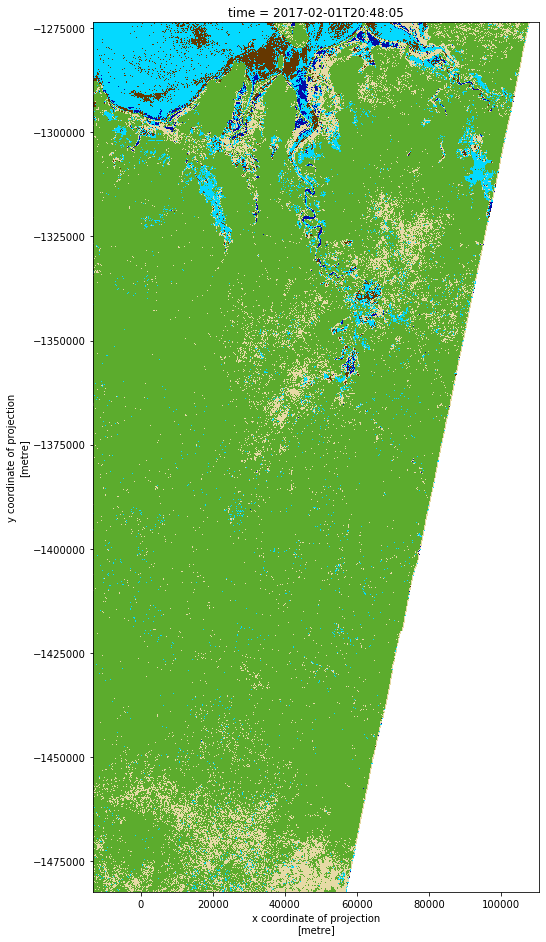

In [14]:
kakadu_wet2.cover_classes.plot(vmin = 0, vmax = 4.01, levels=6, colors = pal, add_colorbar=False,figsize=(8,16))

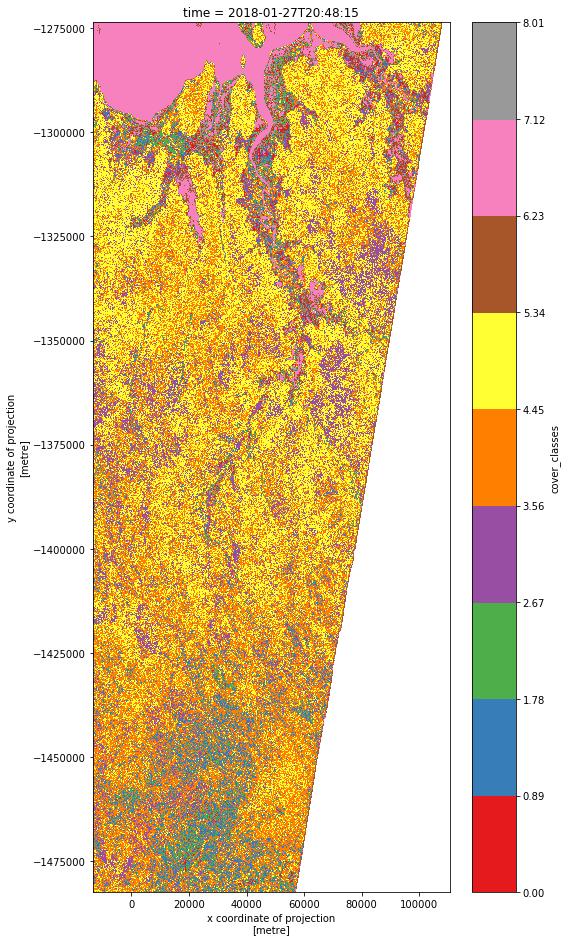

In [174]:
kakadu_wet2.cover_classes.plot(vmin=0,vmax=8.01,levels=10,cmap='Set1',figsize=(8,16))

In [171]:
del(kakadu_wet)

In [24]:
import gc
gc.collect()

4

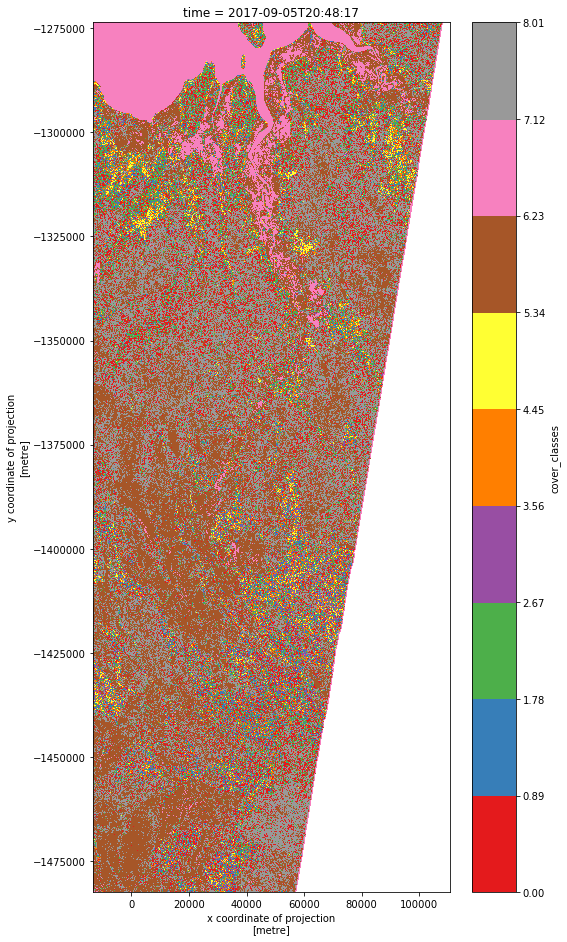

In [176]:
kakadu_dry.cover_classes.plot(vmin=0,vmax=8.01,levels=10,cmap='Set1',figsize=(8,16))

In [ ]:
dcO = Datacube()